<a href="https://colab.research.google.com/github/capnjazzy0/banana/blob/main/Bananas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 813.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 20.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.1.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 44.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.1 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 2.1.1 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.1.1 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import trange
import tqdm

from sklearn import linear_model, preprocessing
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    mean_squared_error, root_mean_squared_error, r2_score, f1_score,
    confusion_matrix, precision_score, recall_score, roc_curve, accuracy_score, roc_auc_score
)
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from mlxtend.evaluate import bias_variance_decomp
import plotly.express as px
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
import statsmodels.api as sm

def cross_valid(x, y):
  k_values = [i for i in range(3, 16)]
  mean_scores = []
  for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    scores = np.mean(cross_val_score(model, x, y, cv = 5, scoring='recall'))
    mean_scores.append(np.mean(scores))
  for k, score in zip(k_values, mean_scores):
    print(f'k = {k}, recall = {score}')

def get_charts(df, col):
  print(f'Распределение для переменной {col}')
  print('_____________________________')

  f, ax = plt.subplots(1,2, figsize=(10,5))
  sns.boxplot(data=df, y=col, ax=ax[0], color='red')
  ax[0].set_title(f'{col} Outliers')

  sns.histplot(data=df, x=col, ax=ax[1])
  ax[1].set_title(f'{col} Distribution')
  plt.show()

results = pd.DataFrame(columns = ['Method', 'Accuracy', 'Recall', 'Precision', 'F1', 'ROC-AUC'])

def result(method, y_true, y_pred, results=results):
  accuracy = accuracy_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  auc = roc_auc_score(y_true, y_pred)

  print('Accuracy = ', accuracy)
  print('Recall = ', recall)
  print('Precision = ', precision)
  print('F1 = ', f1)
  print('ROC-AUC = ', auc)

  return {'Method': method, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1': f1, 'ROC-AUC': auc}

bananas = pd.read_csv('/content/drive/MyDrive/colab/banana_quality.csv')
d = {"Good": 1, "Bad": 0}
bananas['Quality'] = bananas['Quality'].map(d)
bananas.columns = bananas.columns.str.lower()

df = bananas.drop(['quality'], axis=1)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,size,weight,sweetness,softness,harvesttime,ripeness,acidity
size,1.000000,-0.181933,-0.258027,0.164526,0.582014,0.042587,-0.140673
weight,-0.181933,1.000000,0.422683,-0.189908,-0.079465,-0.035276,0.443879
sweetness,-0.258027,0.422683,1.000000,-0.095338,-0.201657,0.180095,0.187059
softness,0.164526,-0.189908,-0.095338,1.000000,0.194734,-0.253804,-0.146014
harvesttime,0.582014,-0.079465,-0.201657,0.194734,1.000000,0.107127,-0.090903
ripeness,0.042587,-0.035276,0.180095,-0.253804,0.107127,1.000000,-0.351531
acidity,-0.140673,0.443879,0.187059,-0.146014,-0.090903,-0.351531,1.000000


Number of 0: 3994
Number of 1: 4006
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   size         8000 non-null   float64
 1   weight       8000 non-null   float64
 2   sweetness    8000 non-null   float64
 3   softness     8000 non-null   float64
 4   harvesttime  8000 non-null   float64
 5   ripeness     8000 non-null   float64
 6   acidity      8000 non-null   float64
 7   quality      8000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 500.1 KB
              size       weight    sweetness     softness  harvesttime  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean     -0.747802    -0.761019    -0.770224    -0.014441    -0.751288   
std       2.136023     2.015934     1.948455     2.065216     1.996661   
min      -7.998074    -8.283002    -6.434022    -6.959320    -7.570008   
25%      -2.2776

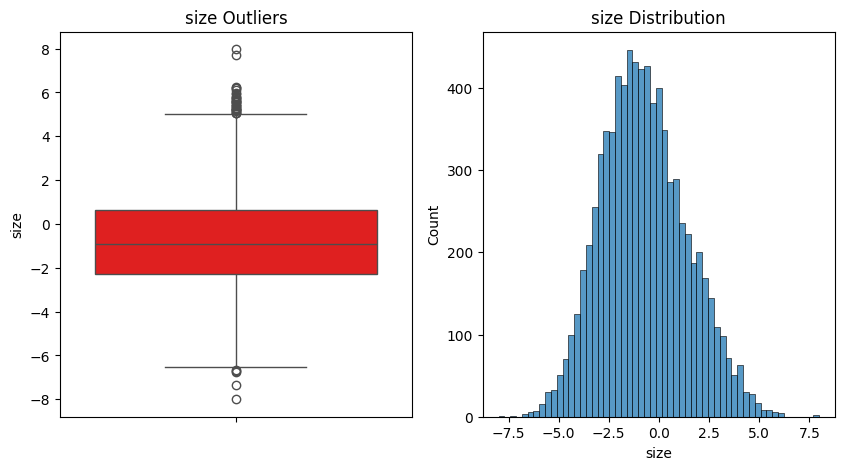

Распределение для переменной weight
_____________________________


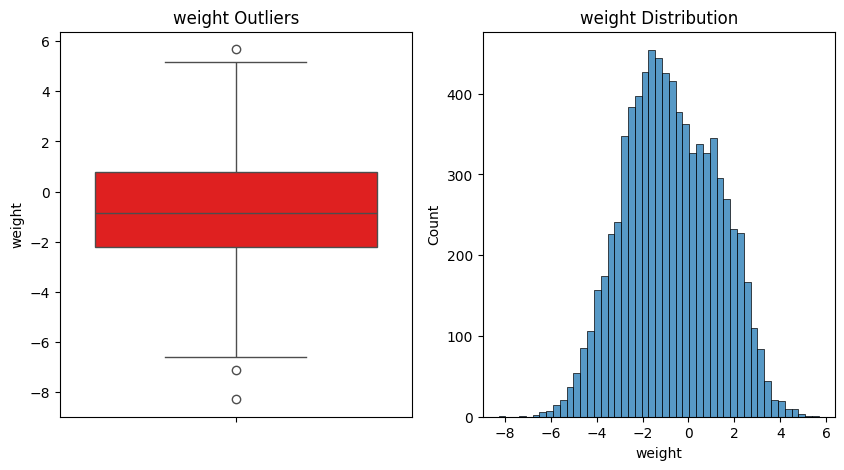

Распределение для переменной sweetness
_____________________________


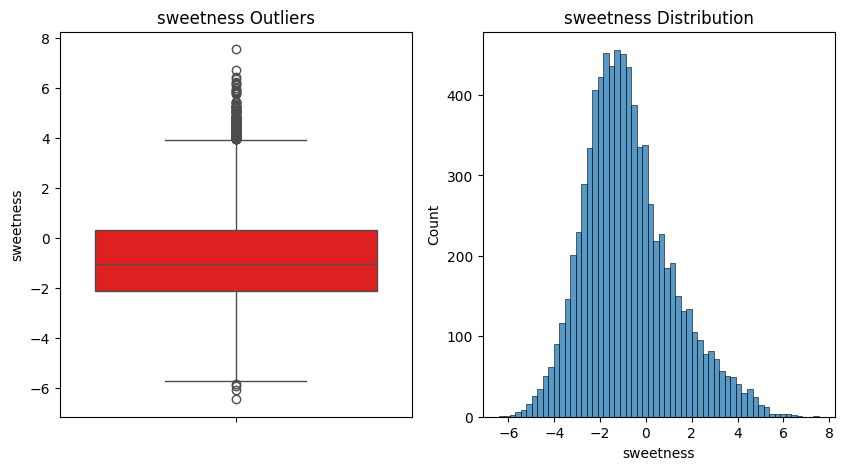

Распределение для переменной softness
_____________________________


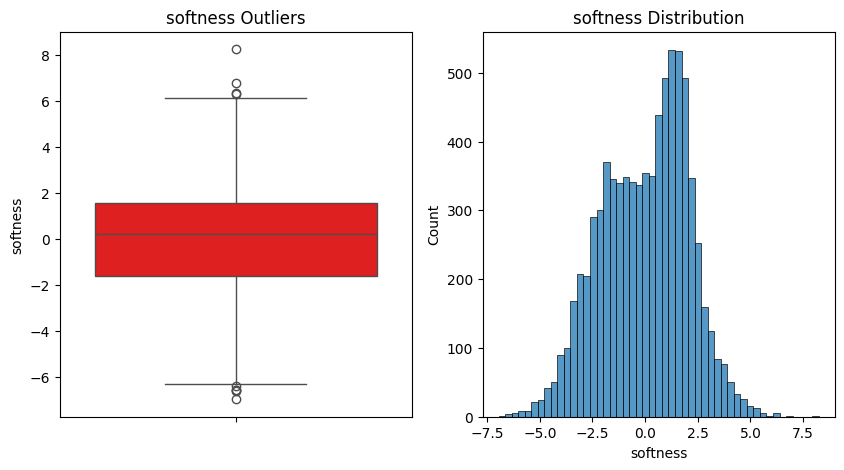

Распределение для переменной harvesttime
_____________________________


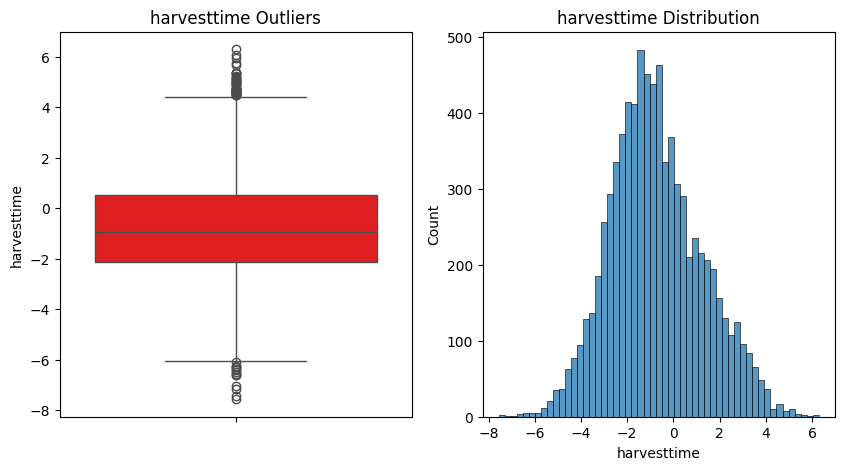

Распределение для переменной ripeness
_____________________________


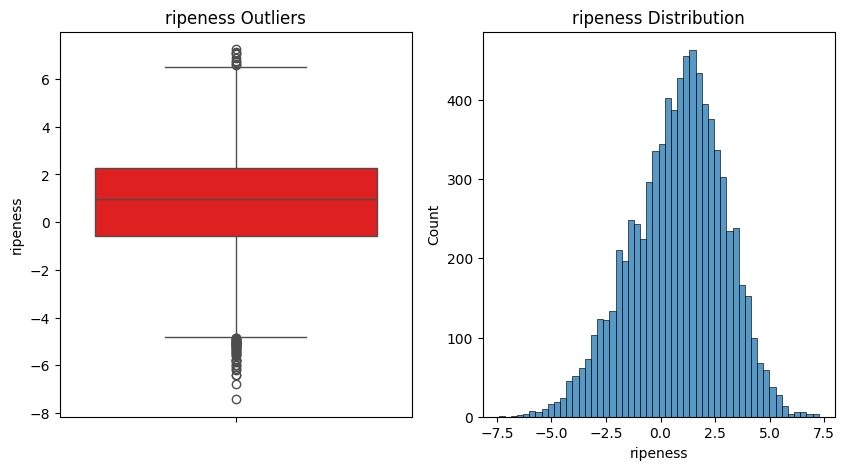

Распределение для переменной acidity
_____________________________


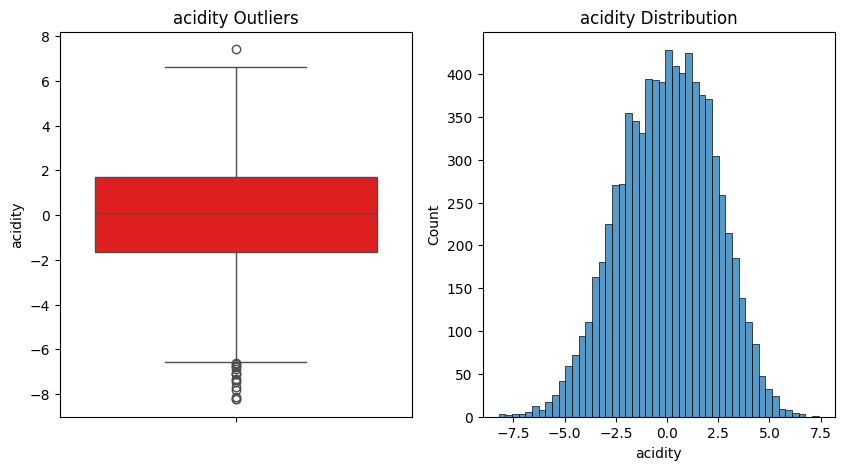

In [ ]:
y = bananas['quality']
print('Number of 0:', y.value_counts().get(0, 0))
print('Number of 1:', y.value_counts().get(1, 0))


bananas.info()
print(bananas.describe())

for col in df:
  get_charts(df, col)

# Preprocessing

In [ ]:
bananas_clean = bananas.copy()

for col in ['size', 'sweetness', 'harvesttime', 'ripeness']: #метод Тьюки
    upper = (bananas_clean[col].quantile(0.75) + 1.5*(bananas_clean[col].quantile(0.75) - bananas_clean[col].quantile(0.25)))
    lower = (bananas_clean[col].quantile(0.25) - 1.5*(bananas_clean[col].quantile(0.75) - bananas_clean[col].quantile(0.25)))

    bananas_clean = bananas_clean[(bananas_clean[col] >= lower) & (bananas_clean[col] <= upper)]

x = bananas_clean.drop(['quality'], axis=1)
y = bananas_clean['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic regression

MSE for test: 0.12083333333333333
MSE for train: 0.12777777777777777
R2 for test: 0.5165486365486365
R2 for train: 0.4882595167016147


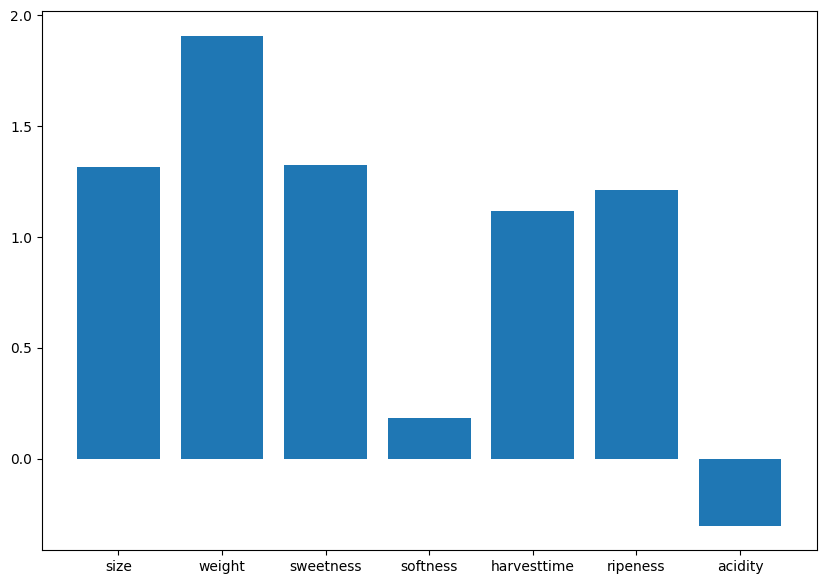

Accuracy =  0.8791666666666667
Recall =  0.8902564102564102
Precision =  0.8741188318227593
F1 =  0.8821138211382114
ROC-AUC =  0.8789906389906389


<ipython-input-24-84186cdc7035>:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([res])])


,Method,Accuracy,Recall,Precision,F1,ROC-AUC
0,Logistic Regression,0.879167,0.890256,0.874119,0.882114,0.878991


In [ ]:
model = LogisticRegression().fit(x_train, y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

print('MSE for test:', mean_squared_error(y_test, y_pred_test))
print('MSE for train:', mean_squared_error(y_train, y_pred_train))
print('R2 for test:', r2_score(y_test, y_pred_test))
print('R2 for train:', r2_score(y_train, y_pred_train))

plt.figure(figsize=(10, 7))
names = list(x.columns)

plt.bar(names, model.coef_[0])
plt.show()

res = result('Logistic Regression', y_test, y_pred_test)

results = pd.concat([results, pd.DataFrame([res])])
results

# Ridge classifier

MSE for test: 0.121875
MSE for train: 0.12743055555555555
R2 for test: 0.5123809523809524
R2 for train: 0.4896501158410125


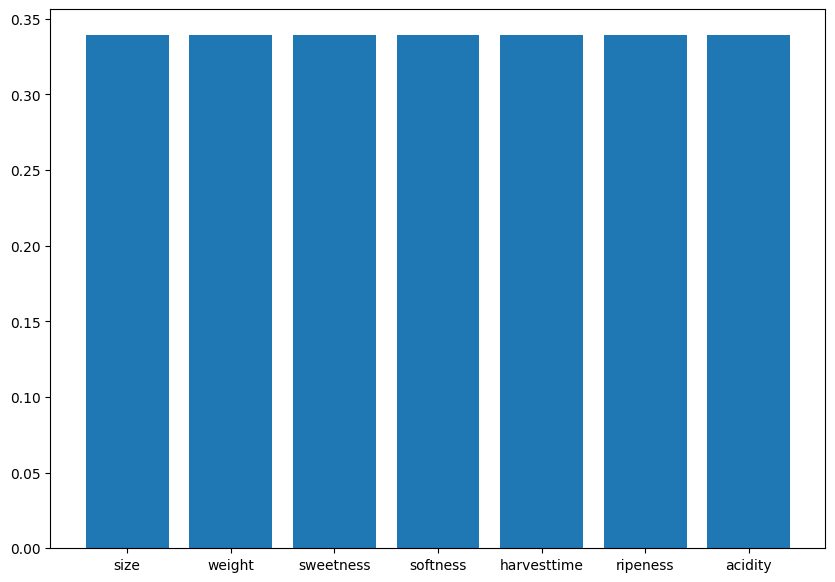

Accuracy =  0.878125
Recall =  0.8912820512820513
Precision =  0.8716148445336008
F1 =  0.8813387423935092
ROC-AUC =  0.877916157916158


,Method,Accuracy,Recall,Precision,F1,ROC-AUC
0,Logistic Regression,0.879167,0.890256,0.874119,0.882114,0.878991
0,Ridge Classifier,0.878125,0.891282,0.871615,0.881339,0.877916


In [ ]:
model = RidgeClassifier().fit(x_train, y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

print('MSE for test:', mean_squared_error(y_test, y_pred_test))
print('MSE for train:', mean_squared_error(y_train, y_pred_train))
print('R2 for test:', r2_score(y_test, y_pred_test))
print('R2 for train:', r2_score(y_train, y_pred_train))

plt.figure(figsize=(10, 7))
names = list(x.columns)

plt.bar(names, model.coef_[0])
plt.show()

res = result('Ridge Classifier', y_test, y_pred_test)

results = pd.concat([results, pd.DataFrame([res])])
results

# LASSO

MSE for test: 0.11875
MSE for train: 0.1326388888888889
R2 for test: 0.5248840048840049
R2 for train: 0.4687911287500457


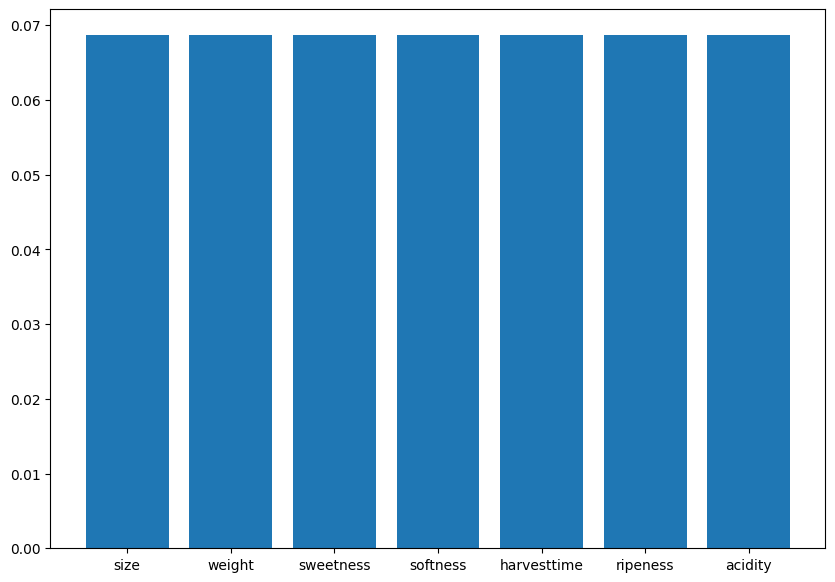

Accuracy =  0.88125
Recall =  0.8851282051282051
Precision =  0.881511746680286
F1 =  0.8833162743091095
ROC-AUC =  0.8811884411884412


,Method,Accuracy,Recall,Precision,F1,ROC-AUC
0,Logistic Regression,0.879167,0.890256,0.874119,0.882114,0.878991
0,Ridge Classifier,0.878125,0.891282,0.871615,0.881339,0.877916
0,LASSO,0.881250,0.885128,0.881512,0.883316,0.881188


In [ ]:
model = linear_model.Lasso(alpha=0.1).fit(x_train, y_train)

y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

y_pred_test = (y_pred_test > 0.5).astype(int)
y_pred_train = (y_pred_train > 0.5).astype(int)

print('MSE for test:', mean_squared_error(y_test, y_pred_test))
print('MSE for train:', mean_squared_error(y_train, y_pred_train))
print('R2 for test:', r2_score(y_test, y_pred_test))
print('R2 for train:', r2_score(y_train, y_pred_train))

plt.figure(figsize=(10, 7))
names = list(x.columns)

plt.bar(names, model.coef_[0])
plt.show()

res = result('LASSO', y_test, y_pred_test)

results = pd.concat([results, pd.DataFrame([res])])
results

# K-Neighbors Classifier

In [ ]:
cross_valid(x, y)

k = 3, recall = 0.9709603195739014
k = 4, recall = 0.9603039502885042
k = 5, recall = 0.968828406569019
k = 6, recall = 0.9635000443852639
k = 7, recall = 0.969360674656014
k = 8, recall = 0.9669628051486907
k = 9, recall = 0.9701599644917888
k = 10, recall = 0.9680291167332445
k = 11, recall = 0.9701603195739015
k = 12, recall = 0.968028406569019
k = 13, recall = 0.9704262760763427
k = 14, recall = 0.9677620949844652
k = 15, recall = 0.970959609409676


Test: 0.98125
Train: 0.9842013888888889
Train precision: 0.9859002169197397, Train recall: 0.981288233177402
Test precision: 0.9835221421215242, Test recall: 0.9794871794871794
Accuracy =  0.98125
Recall =  0.9794871794871794
Precision =  0.9835221421215242
F1 =  0.9815005138746146
ROC-AUC =  0.9812779812779814


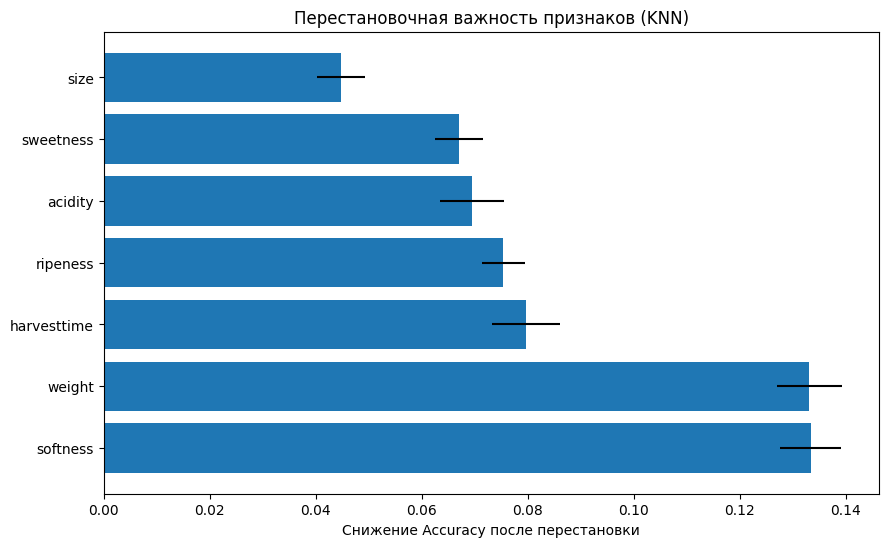

,Method,Accuracy,Recall,Precision,F1,ROC-AUC
0,Logistic Regression,0.879167,0.890256,0.874119,0.882114,0.878991
0,Ridge Classifier,0.878125,0.891282,0.871615,0.881339,0.877916
0,LASSO,0.881250,0.885128,0.881512,0.883316,0.881188
0,K-Neighbors,0.981250,0.979487,0.983522,0.981501,0.981278
0,K-Neighbors,0.981250,0.979487,0.983522,0.981501,0.981278


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train, y_train)
score_test = model.score(x_test, y_test)
score_train = model.score(x_train, y_train)
print('Test:', score_test)
print('Train:', score_train)

y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

print(f'Train precision: {precision_score(y_train, y_pred_train)}, Train recall: {recall_score(y_train, y_pred_train)}')
print(f'Test precision: {precision_score(y_test, y_pred_test)}, Test recall: {recall_score(y_test, y_pred_test)}')

res = result('K-Neighbors', y_test, y_pred_test)

result_features = permutation_importance(
    model, x_test, y_test, n_repeats=10, random_state=42, scoring='accuracy'
)

sorted_idx = result_features.importances_mean.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.barh(
    x.columns[sorted_idx],
    result_features.importances_mean[sorted_idx],
    xerr=result_features.importances_std[sorted_idx],
    align='center'
)
plt.xlabel("Снижение Accuracy после перестановки")
plt.title("Перестановочная важность признаков (KNN)")
plt.show()

results = pd.concat([results, pd.DataFrame([res])])
results

# Decision Tree

{'ccp_alpha': 0.01, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}


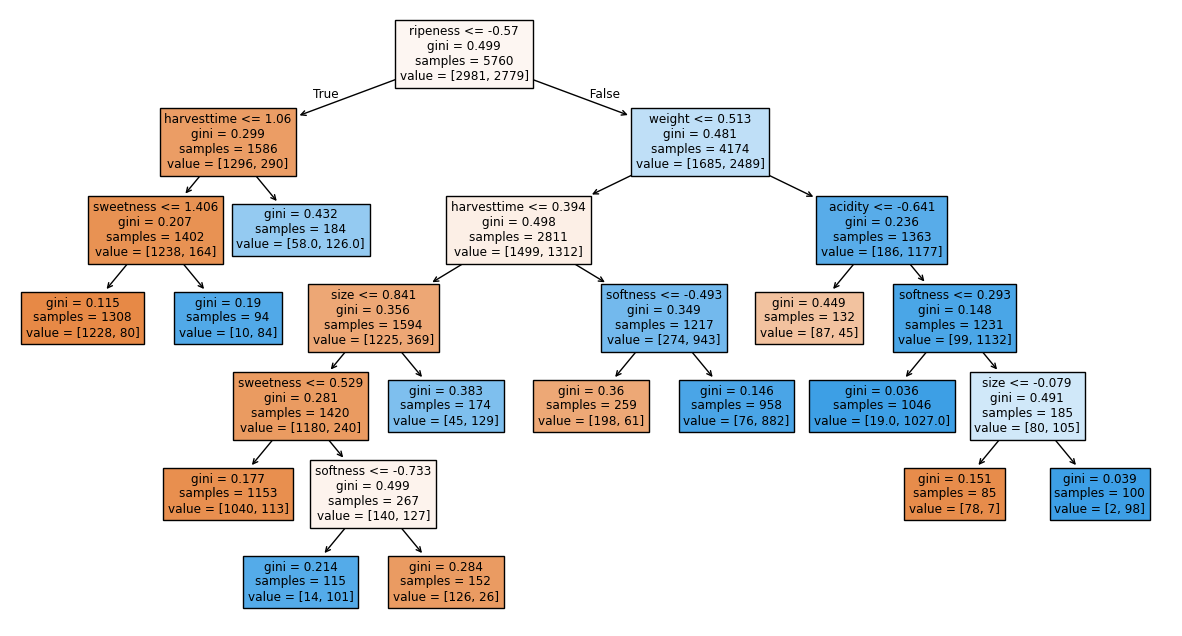

In [ ]:
param_grid = {
    'max_depth': [10,15,200],
    'min_samples_split': [5,10,15],
    'min_samples_leaf': [5,10,15],
    'ccp_alpha': [0.01, 1, 10]
}

model = DecisionTreeClassifier()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_tree = grid_search.best_estimator_
print(best_params)

plt.figure(figsize=(15, 8))
plot_tree(best_tree, filled=True, feature_names = x.columns)
plt.show()

Test: 0.8963541666666667
Train: 0.9034722222222222
Train precision: 0.9161362785473606, Train recall: 0.8805325656711047
Test precision: 0.9101479915433404, Test recall: 0.8830769230769231


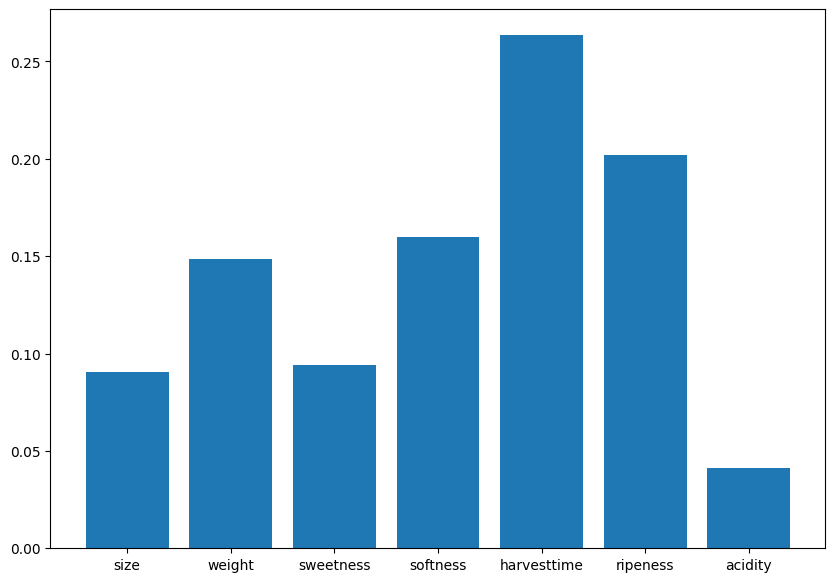

Accuracy =  0.8963541666666667
Recall =  0.8830769230769231
Precision =  0.9101479915433404
F1 =  0.8964081207704321
ROC-AUC =  0.8965649165649164


,Method,Accuracy,Recall,Precision,F1,ROC-AUC
0,Logistic Regression,0.879167,0.890256,0.874119,0.882114,0.878991
0,Ridge Classifier,0.878125,0.891282,0.871615,0.881339,0.877916
0,LASSO,0.881250,0.885128,0.881512,0.883316,0.881188
0,K-Neighbors,0.981250,0.979487,0.983522,0.981501,0.981278
0,K-Neighbors,0.981250,0.979487,0.983522,0.981501,0.981278
0,Decision Tree Classifier,0.896354,0.883077,0.910148,0.896408,0.896565


In [ ]:
model = DecisionTreeClassifier(**best_params)
model.fit(x_train, y_train)
score_test = model.score(x_test, y_test)
score_train = model.score(x_train, y_train)

print('Test:', score_test)
print('Train:', score_train)

y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

print(f'Train precision: {precision_score(y_train, y_pred_train)}, Train recall: {recall_score(y_train, y_pred_train)}')
print(f'Test precision: {precision_score(y_test, y_pred_test)}, Test recall: {recall_score(y_test, y_pred_test)}')

plt.figure(figsize=(10, 7))
names = list(x.columns)

plt.bar(names, model.feature_importances_)
plt.show()

res = result('Decision Tree Classifier', y_test, y_pred_test)

results = pd.concat([results, pd.DataFrame([res])])
results

Есть небольшое переобучение, думаю, что некритично

# Bagging Ensemble

MSE on train set: 0.00
MSE on test set: 0.04
Average test loss: 0.04
Average test bias: 0.02
Average test var: 0.02


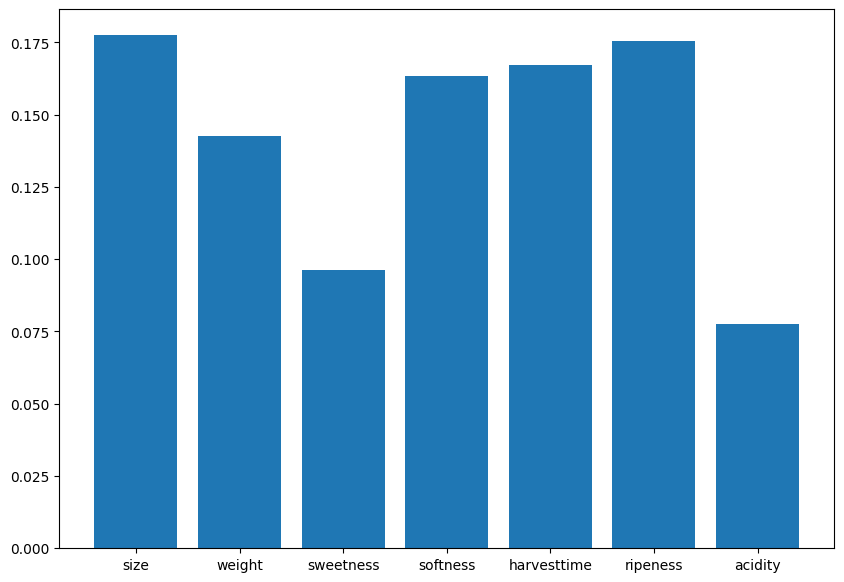

Accuracy =  0.95625
Recall =  0.9405128205128205
Precision =  0.9724284199363733
F1 =  0.9562043795620438
ROC-AUC =  0.9564997964997966


,Method,Accuracy,Recall,Precision,F1,ROC-AUC
0,Logistic Regression,0.879167,0.890256,0.874119,0.882114,0.878991
0,Ridge Classifier,0.878125,0.891282,0.871615,0.881339,0.877916
0,LASSO,0.881250,0.885128,0.881512,0.883316,0.881188
0,K-Neighbors,0.981250,0.979487,0.983522,0.981501,0.981278
0,K-Neighbors,0.981250,0.979487,0.983522,0.981501,0.981278
0,Decision Tree Classifier,0.896354,0.883077,0.910148,0.896408,0.896565
0,Bagging Ensemble,0.956250,0.940513,0.972428,0.956204,0.956500


In [ ]:
tree = DecisionTreeClassifier()

bag = BaggingClassifier(tree, n_estimators=10, n_jobs=-1)
bag.fit(x_train, y_train)

print(f'MSE on train set: {mean_squared_error(y_train, bag.predict(x_train)):.2f}')
print(f'MSE on test set: {mean_squared_error(y_test, bag.predict(x_test)):.2f}')

avg_loss, avg_bias, avg_var = bias_variance_decomp(bag, x_train, np.array(y_train), x_test, np.array(y_test), loss = 'mse')

print(f'Average test loss: {avg_loss:.2f}')
print(f'Average test bias: {avg_bias:.2f}')
print(f'Average test var: {avg_var:.2f}')

y_pred = bag.predict(x_test)

plt.figure(figsize=(10, 7))
names = list(x.columns)

importances = [tree.feature_importances_ for tree in bag.estimators_]
mean_importance = np.mean(importances, axis=0)

plt.bar(names, mean_importance)
plt.show()

res = result('Bagging Ensemble', y_test, y_pred)

results = pd.concat([results, pd.DataFrame([res])])
results

# Random Forest

In [ ]:
score_dict={}
for n in tqdm.tqdm(range(10, 500, 100), desc = 'Progress'):
  rf = RandomForestClassifier(n_estimators = n, random_state=123, max_samples=0.3)
  scores = cross_val_score(rf, x_train, y_train, cv= 5, scoring='accuracy')
  avg_score = np.mean(scores)
  score_dict[n] = avg_score

Progress: 100%|██████████| 5/5 [00:33<00:00,  6.78s/it]


In [ ]:
px.line(x=score_dict.keys(), y=score_dict.values(), labels = {'y':'Accuracy', 'x':'number of trees'}).show()

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, max_samples = 0.25, oob_score = True)
rf.fit(x_train, y_train)

print('OOB-Score:', rf.oob_score_)

print(f'MSE on train set: {mean_squared_error(y_train, rf.predict(x_train)):.2f}')
print(f'MSE on test set: {mean_squared_error(y_test, rf.predict(x_test)):.2f}')

avg_loss, avg_bias, avg_var = bias_variance_decomp(rf, x_train, np.array(y_train), x_test, np.array(y_test), loss = 'mse')

print(f'Average test loss: {avg_loss:.2f}')
print(f'Average test bias: {avg_bias:.2f}')

y_pred = rf.predict(x_test)

print(f'Average test var: {avg_var:.2f}')

res = result('Random Forest Classifier', y_test, y_pred)

results = pd.concat([results, pd.DataFrame([res])])
results

OOB-Score: 0.9654513888888889
MSE on train set: 0.02
MSE on test set: 0.03
Average test loss: 0.03
Average test bias: 0.03
Average test var: 0.01
Accuracy =  0.9661458333333334
Recall =  0.9651282051282051
Precision =  0.9681069958847737
F1 =  0.9666153055983564
ROC-AUC =  0.9661619861619861


,Method,Accuracy,Recall,Precision,F1,ROC-AUC
0,Logistic Regression,0.879167,0.890256,0.874119,0.882114,0.878991
0,Ridge Classifier,0.878125,0.891282,0.871615,0.881339,0.877916
0,LASSO,0.881250,0.885128,0.881512,0.883316,0.881188
0,K-Neighbors,0.981250,0.979487,0.983522,0.981501,0.981278
0,K-Neighbors,0.981250,0.979487,0.983522,0.981501,0.981278
0,Decision Tree Classifier,0.896354,0.883077,0.910148,0.896408,0.896565
0,Bagging Ensemble,0.956250,0.940513,0.972428,0.956204,0.956500
0,Random Forest Classifier,0.966146,0.965128,0.968107,0.966615,0.966162


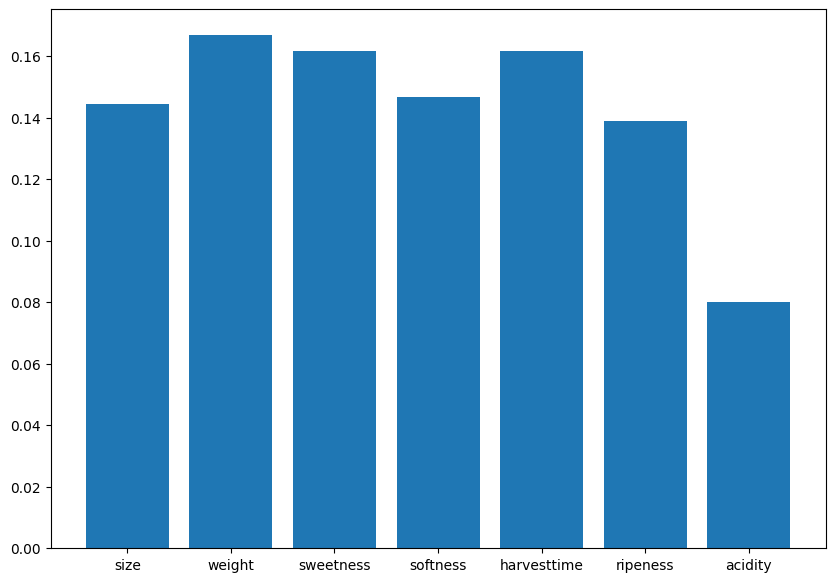

In [ ]:
plt.figure(figsize=(10, 7))
names = list(x.columns)

plt.bar(names, rf.feature_importances_)
plt.show()

# Boosting

Accuracy =  0.9546875
Recall =  0.9456410256410256
Precision =  0.9644351464435147
F1 =  0.9549456240290005
ROC-AUC =  0.9548310948310947
{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 1000}


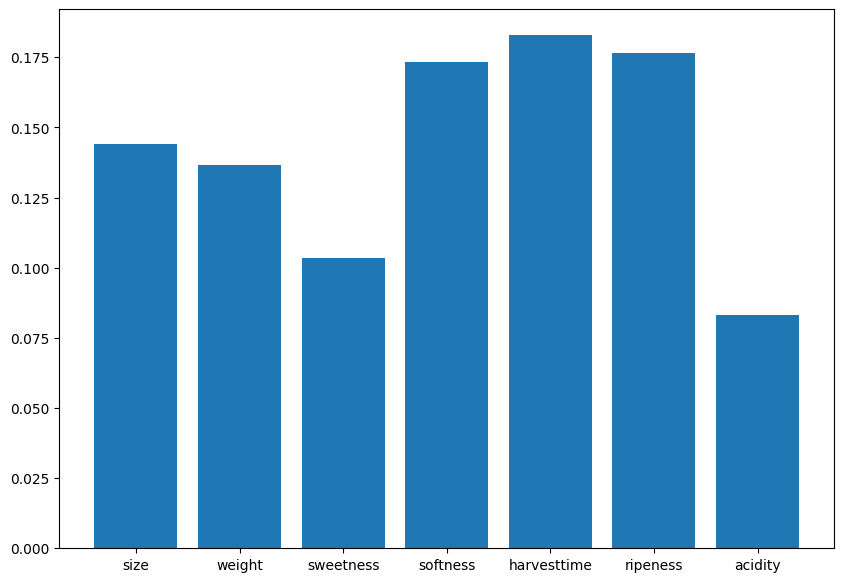

Accuracy =  0.9744791666666667
Recall =  0.9733333333333334
Precision =  0.9763374485596708
F1 =  0.9748330765279918
ROC-AUC =  0.9744973544973545


,Method,Accuracy,Recall,Precision,F1,ROC-AUC
0,Logistic Regression,0.879167,0.890256,0.874119,0.882114,0.878991
0,Ridge Classifier,0.878125,0.891282,0.871615,0.881339,0.877916
0,LASSO,0.881250,0.885128,0.881512,0.883316,0.881188
0,K-Neighbors,0.981250,0.979487,0.983522,0.981501,0.981278
0,K-Neighbors,0.981250,0.979487,0.983522,0.981501,0.981278
0,Decision Tree Classifier,0.896354,0.883077,0.910148,0.896408,0.896565
0,Bagging Ensemble,0.956250,0.940513,0.972428,0.956204,0.956500
0,Random Forest Classifier,0.966146,0.965128,0.968107,0.966615,0.966162
0,GBC,0.954688,0.945641,0.964435,0.954946,0.954831
0,GBCGS,0.977083,0.977436,0.977436,0.977436,0.977078


In [ ]:
GBC = GradientBoostingClassifier()

GBC.fit(x_train, y_train)

y_pred = GBC.predict(x_test)

res = result('GBC', y_test, y_pred)
results = pd.concat([results, pd.DataFrame([res])])

param_grid = {
    'n_estimators':[100, 500, 1000],
    'max_depth':[3,5,7],
    'learning_rate':[0.3,0.1]
}

grid_search = GridSearchCV(GBC, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)

GBCGS = GradientBoostingClassifier(**best_params)

GBCGS.fit(x_train, y_train)

y_pred = GBCGS.predict(x_test)

plt.figure(figsize=(10, 7))
names = list(x.columns)

plt.bar(names, GBCGS.feature_importances_)
plt.show()

res = result('GBCGS', y_test, y_pred)
results = pd.concat([results, pd.DataFrame([res])])
results

Accuracy =  0.9755208333333333
Recall =  0.9733333333333334
Precision =  0.9783505154639175
F1 =  0.9758354755784062
ROC-AUC =  0.9755555555555556
{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 500}


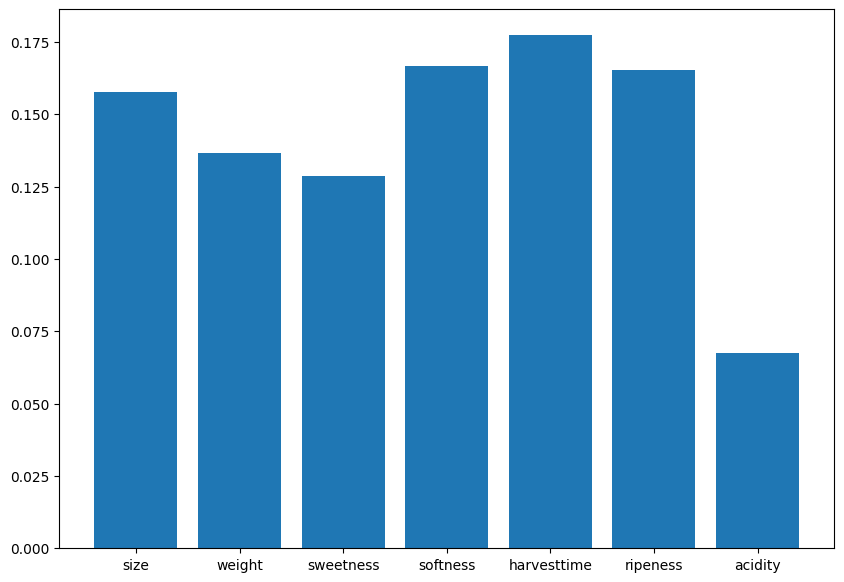

Accuracy =  0.9755208333333333
Recall =  0.9702564102564103
Precision =  0.9813278008298755
F1 =  0.9757607013924704
ROC-AUC =  0.9756043956043955


,Method,Accuracy,Recall,Precision,F1,ROC-AUC
0,Logistic Regression,0.879167,0.890256,0.874119,0.882114,0.878991
0,Ridge Classifier,0.878125,0.891282,0.871615,0.881339,0.877916
0,LASSO,0.881250,0.885128,0.881512,0.883316,0.881188
0,K-Neighbors,0.981250,0.979487,0.983522,0.981501,0.981278
0,K-Neighbors,0.981250,0.979487,0.983522,0.981501,0.981278
0,Decision Tree Classifier,0.896354,0.883077,0.910148,0.896408,0.896565
0,Bagging Ensemble,0.956250,0.940513,0.972428,0.956204,0.956500
0,Random Forest Classifier,0.966146,0.965128,0.968107,0.966615,0.966162
0,GBC,0.954688,0.945641,0.964435,0.954946,0.954831
0,GBCGS,0.977083,0.977436,0.977436,0.977436,0.977078


In [ ]:
XGB = XGBClassifier()

XGB.fit(x_train, y_train)

y_pred = XGB.predict(x_test)

res = result('XGB', y_test, y_pred)
results = pd.concat([results, pd.DataFrame([res])])

grid_search = GridSearchCV(XGB, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)

XGBGS = XGBClassifier(**best_params)

XGBGS.fit(x_train, y_train)

plt.figure(figsize=(10, 7))
names = list(x.columns)

plt.bar(names, XGBGS.feature_importances_)
plt.show()

y_pred = XGBGS.predict(x_test)

res = result('XGBGS', y_test, y_pred)
results = pd.concat([results, pd.DataFrame([res])])
results

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2779, number of negative: 2981
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 5760, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.482465 -> initscore=-0.070168
[LightGBM] [Info] Start training from score -0.070168


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Accuracy =  0.975
Recall =  0.9743589743589743
Precision =  0.9763617677286742
F1 =  0.9753593429158111
ROC-AUC =  0.9750101750101752


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Number of positive: 2779, number of negative: 2981
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 5760, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.482465 -> initscore=-0.070168
[LightGBM] [Info] Start training from score -0.070168
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



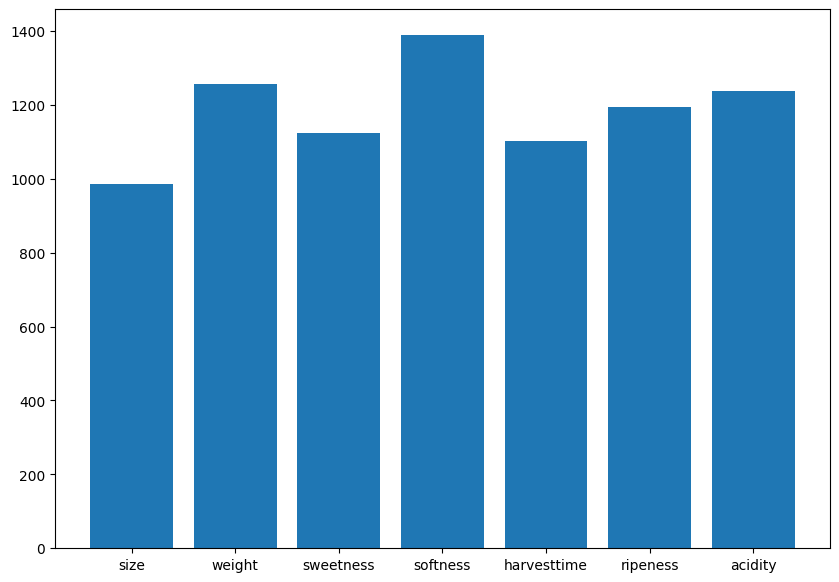

Accuracy =  0.9791666666666666
Recall =  0.9764102564102564
Precision =  0.9824561403508771
F1 =  0.9794238683127572
ROC-AUC =  0.9792104192104192


,Method,Accuracy,Recall,Precision,F1,ROC-AUC
0,Logistic Regression,0.879167,0.890256,0.874119,0.882114,0.878991
0,Ridge Classifier,0.878125,0.891282,0.871615,0.881339,0.877916
0,LASSO,0.881250,0.885128,0.881512,0.883316,0.881188
0,K-Neighbors,0.981250,0.979487,0.983522,0.981501,0.981278
0,K-Neighbors,0.981250,0.979487,0.983522,0.981501,0.981278
0,Decision Tree Classifier,0.896354,0.883077,0.910148,0.896408,0.896565
0,Bagging Ensemble,0.956250,0.940513,0.972428,0.956204,0.956500
0,Random Forest Classifier,0.966146,0.965128,0.968107,0.966615,0.966162
0,GBC,0.954688,0.945641,0.964435,0.954946,0.954831
0,GBCGS,0.977083,0.977436,0.977436,0.977436,0.977078


In [ ]:
LGBM = LGBMClassifier()

LGBM.fit(x_train, y_train)

y_pred = LGBM.predict(x_test)

res = result('LGBM', y_test, y_pred)
results = pd.concat([results, pd.DataFrame([res])])

grid_search = GridSearchCV(LGBM, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)

LGBMGS = LGBMClassifier(**best_params)

LGBMGS.fit(x_train, y_train)

y_pred = LGBMGS.predict(x_test)

plt.figure(figsize=(10, 7))
names = list(x.columns)

plt.bar(names, LGBMGS.feature_importances_)
plt.show()

res = result('LGBMGS', y_test, y_pred)

results = pd.concat([results, pd.DataFrame([res])])
results

Learning rate set to 0.021759
0:	learn: 0.6671141	total: 7.85ms	remaining: 7.84s
1:	learn: 0.6433361	total: 11.8ms	remaining: 5.9s
2:	learn: 0.6209043	total: 15.8ms	remaining: 5.26s
3:	learn: 0.5981280	total: 22.9ms	remaining: 5.71s
4:	learn: 0.5762700	total: 26.8ms	remaining: 5.33s
5:	learn: 0.5577169	total: 30.6ms	remaining: 5.07s
6:	learn: 0.5390411	total: 34.6ms	remaining: 4.9s
7:	learn: 0.5248118	total: 38.3ms	remaining: 4.75s
8:	learn: 0.5083000	total: 43.1ms	remaining: 4.74s
9:	learn: 0.4945954	total: 47.3ms	remaining: 4.68s
10:	learn: 0.4805022	total: 51.7ms	remaining: 4.65s
11:	learn: 0.4674021	total: 55.6ms	remaining: 4.58s
12:	learn: 0.4549512	total: 62ms	remaining: 4.7s
13:	learn: 0.4413968	total: 66.1ms	remaining: 4.65s
14:	learn: 0.4287201	total: 70ms	remaining: 4.59s
15:	learn: 0.4203375	total: 73.8ms	remaining: 4.54s
16:	learn: 0.4102604	total: 77.5ms	remaining: 4.48s
17:	learn: 0.4008480	total: 81.2ms	remaining: 4.43s
18:	learn: 0.3917184	total: 85.3ms	remaining: 4.4s


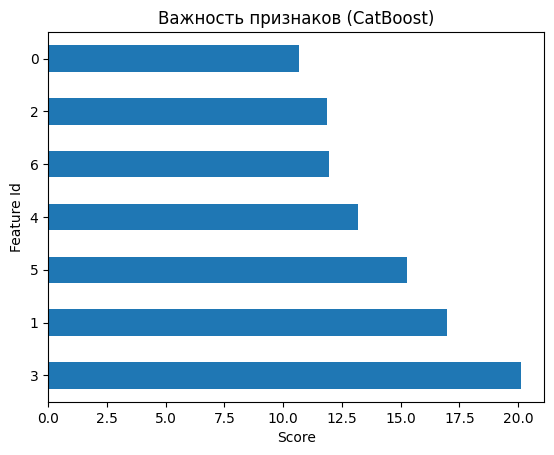

Accuracy =  0.9796875
Recall =  0.9784615384615385
Precision =  0.9814814814814815
F1 =  0.9799691833590138
ROC-AUC =  0.9797069597069596


,Method,Accuracy,Recall,Precision,F1,ROC-AUC
0,Logistic Regression,0.879167,0.890256,0.874119,0.882114,0.878991
0,Ridge Classifier,0.878125,0.891282,0.871615,0.881339,0.877916
0,LASSO,0.881250,0.885128,0.881512,0.883316,0.881188
0,K-Neighbors,0.981250,0.979487,0.983522,0.981501,0.981278
0,K-Neighbors,0.981250,0.979487,0.983522,0.981501,0.981278
0,Decision Tree Classifier,0.896354,0.883077,0.910148,0.896408,0.896565
0,Bagging Ensemble,0.956250,0.940513,0.972428,0.956204,0.956500
0,Random Forest Classifier,0.966146,0.965128,0.968107,0.966615,0.966162
0,GBC,0.954688,0.945641,0.964435,0.954946,0.954831
0,GBCGS,0.977083,0.977436,0.977436,0.977436,0.977078


In [ ]:
CAT = CatBoostClassifier()

CAT.fit(x_train, y_train)

y_pred = CAT.predict(x_test)

res = result('CAT', y_test, y_pred)
results = pd.concat([results, pd.DataFrame([res])])

grid_search = GridSearchCV(CAT, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)

CATGS = CatBoostClassifier(**best_params)

CATGS.fit(x_train, y_train)

importance = CAT.get_feature_importance(type='PredictionValuesChange', prettified=True)

importance.plot(kind='barh', x='Feature Id', y='Importances', legend=False)
plt.title('Важность признаков (CatBoost)')
plt.xlabel('Score')
plt.show()
y_pred = CATGS.predict(x_test)

res = result('CATGS', y_test, y_pred)
results = pd.concat([results, pd.DataFrame([res])])
results

# Keras

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,105 (184.00 KB)

 Trainable params: 46,209 (180.50 KB)

 Non-trainable params: 896 (3.50 KB)

None
Epoch 1/25
162/162 - 9s - 56ms/step - accuracy: 0.9070 - loss: 0.2306 - recall: 0.9053 - val_accuracy: 0.9497 - val_loss: 0.1873 - val_recall: 0.9061
Epoch 2/25
162/162 - 1s - 6ms/step - accuracy: 0.9441 - loss: 0.1501 - recall: 0.9436 - val_accuracy: 0.9705 - val_loss: 0.0966 - val_recall: 0.9531
Epoch 3/25
162/162 - 2s - 13ms/step - accuracy: 0.9539 - loss: 0.1330 - recall: 0.9524 - val_accuracy: 0.9722 - val_loss: 0.0859 - val_recall: 0.9567
Epoch 4/25
162/162 - 2s - 13ms/step - accuracy: 0.9608 - loss: 0.1194 - recall: 0.9576 - val_accuracy: 0.9722 - val_loss: 0.0893 - val_recall: 0.9675
Epoch 5/25
162/162 - 2s - 13ms/step - accuracy: 0.9608 - loss: 0.1206 - recall: 0.9580 - val_accuracy: 0.9757 - val_loss: 0.0842 - val_recall: 0.9639
Epoch 6/25
162/162 - 1s - 7ms/step - accuracy: 0.9612 - loss: 0.1164 - recall: 0.9572 - val_accuracy: 0.9757 - val_loss: 0.0824 - val_recall: 0.9675
Epoch 7/25
162/162 - 1s - 8ms/step - accuracy: 0.9633 - loss: 0.1109 - recall: 0.9616 - val_accur

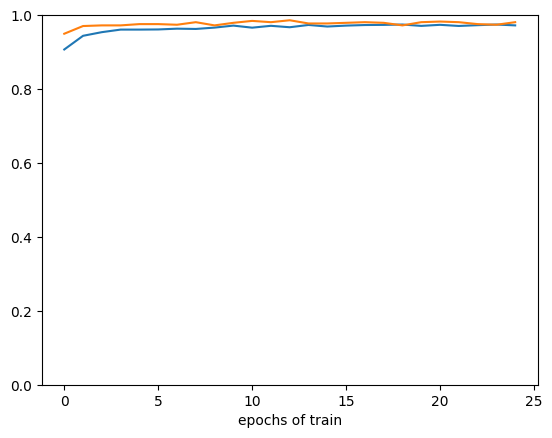

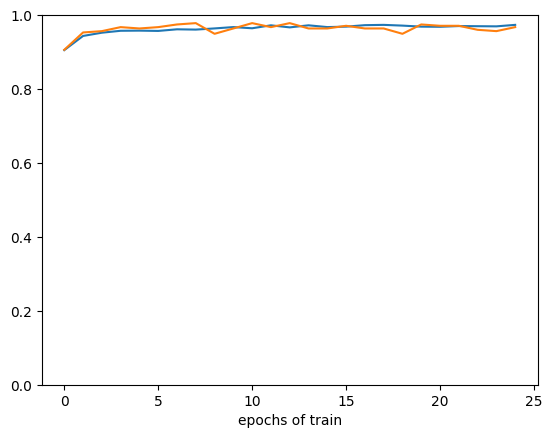

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 

,Method,Accuracy,Recall,Precision,F1,ROC-AUC
0,Logistic Regression,0.879167,0.890256,0.874119,0.882114,0.878991
0,Ridge Classifier,0.878125,0.891282,0.871615,0.881339,0.877916
0,LASSO,0.881250,0.885128,0.881512,0.883316,0.881188
0,K-Neighbors,0.981250,0.979487,0.983522,0.981501,0.981278
0,K-Neighbors,0.981250,0.979487,0.983522,0.981501,0.981278
0,Decision Tree Classifier,0.896354,0.883077,0.910148,0.896408,0.896565
0,Bagging Ensemble,0.956250,0.940513,0.972428,0.956204,0.956500
0,Random Forest Classifier,0.966146,0.965128,0.968107,0.966615,0.966162
0,GBC,0.954688,0.945641,0.964435,0.954946,0.954831
0,GBCGS,0.977083,0.977436,0.977436,0.977436,0.977078


In [ ]:
model = Sequential()

model.add(Dense(256, input_shape = (x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(32, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

print(model.summary())

optimizer = Adam(learning_rate = 0.001)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy', 'recall'])

history = model.fit(x_train, y_train, epochs = 25, validation_split = 0.1, verbose = 2,  batch_size = 32)

plt.plot(history.history['accuracy'], label = 'acc_train')
plt.plot(history.history['val_accuracy'], label = 'acc_val')
plt.xlabel('epochs of train')
plt.ylim(0,1)
plt.show()

plt.plot(history.history['recall'], label = 'recall_train')
plt.plot(history.history['val_recall'], label = 'recall_val')
plt.xlabel('epochs of train')
plt.ylim(0,1)
plt.show()

y_pred = model.predict(x_test)
threshold = 0.8
y_pred_bool = [1 if x > threshold else 0 for x in y_pred]
print(y_pred_bool)

res = result('KERAS Sequential', y_test, y_pred_bool)

results = pd.concat([results, pd.DataFrame([res])])
results
#_ = [print(n) for n in predictions]

                          Accuracy    Recall  Precision        F1   ROC-AUC
Method                                                                     
Logistic Regression       0.879167  0.890256   0.874119  0.882114  0.878991
Ridge Classifier          0.878125  0.891282   0.871615  0.881339  0.877916
LASSO                     0.881250  0.885128   0.881512  0.883316  0.881188
K-Neighbors               0.981250  0.979487   0.983522  0.981501  0.981278
Decision Tree Classifier  0.896354  0.883077   0.910148  0.896408  0.896565
Bagging Ensemble          0.956250  0.940513   0.972428  0.956204  0.956500
Random Forest Classifier  0.966146  0.965128   0.968107  0.966615  0.966162
GBC                       0.954688  0.945641   0.964435  0.954946  0.954831
GBCGS                     0.977083  0.977436   0.977436  0.977436  0.977078
GBCGS                     0.974479  0.973333   0.976337  0.974833  0.974497
XGB                       0.975521  0.973333   0.978351  0.975835  0.975556
XGBGS       

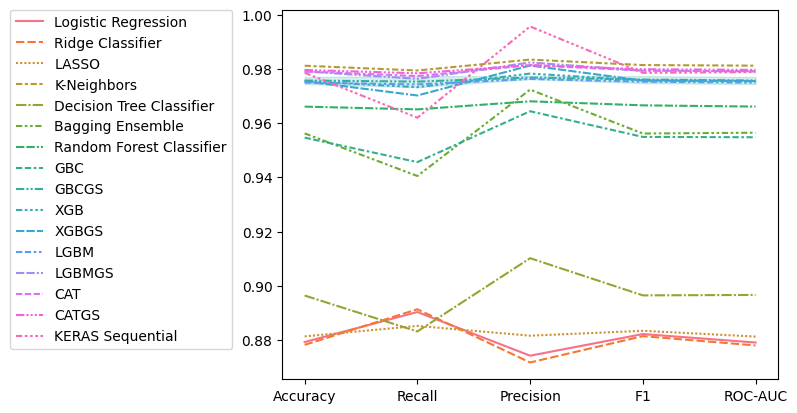

In [ ]:
results = results.drop_duplicates()
#results = results.set_index('Method')
results_transposed = results.transpose()
print(results)
sns.lineplot(results_transposed).legend(bbox_to_anchor=(-0.1, 1), loc='upper right', borderaxespad=0)

In [ ]:
knn_results = results[results['Method'] == 'K-Neighbors']
knn_results = knn_results.set_index(['Method'])
knn_results = knn_results.drop(['level_0', 'index'], axis=1)
knn_results = knn_results.transpose()
knn_results

Method,K-Neighbors
Accuracy,0.981250
Recall,0.979487
Precision,0.983522
F1,0.981501
ROC-AUC,0.981278


<Axes: >

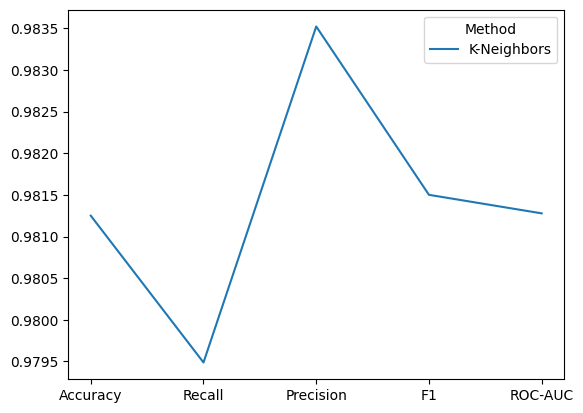

In [ ]:
sns.lineplot(knn_results)